In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

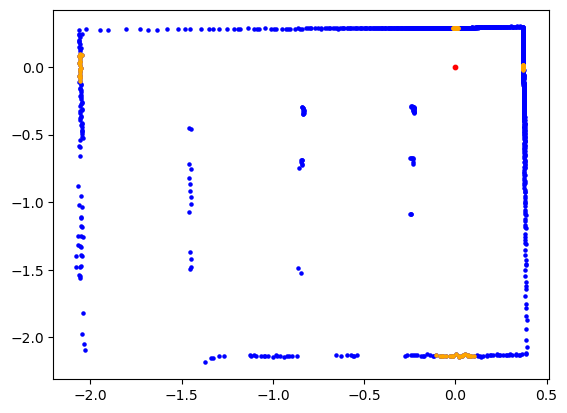

In [2]:
# file names: ['11', '12', '13', '14', '15', '16', '17', '18', '113', '114', '115', '116', '121', '122', '123', '124' ]
# alphaCorrections: [-3, 3, 2.5, -9, 2, -7, -3, 0, 8, 6, 2, 9.5, -5, -6.5, 5, -1]

fileName = '../TestData/16-june/11.csv'
wallAngles = [0,90,180,270]
alphaCorrection = -3

lidarData = []
with open(fileName, 'r') as file: 
    csvReader = csv.reader(file)
    
    for row in csvReader:
        lidarData.append([float(row[0]),float(row[1])])
        
lidarData = np.array(lidarData)

#get cartesian coordinates
x = lidarData[:,1]*np.cos((lidarData[:,0]+ alphaCorrection)*math.pi/180)/1000
y = lidarData[:,1]*np.sin((lidarData[:,0]+ alphaCorrection)*math.pi/180)/1000

#plot
plt.scatter(x, y, s=5, color='blue')
plt.scatter([0],[0], s=10, color='red')

#plot wall points
#get relevant points
wallPoints = []
for a in wallAngles:
    alphaRange = 3
    alpha1 = a + -alphaRange - alphaCorrection
    alpha2 = a + alphaRange - alphaCorrection
    wallPoints.append(lidarData[(lidarData[:, 0] >= alpha1) & (lidarData[:, 0] <= alpha2)])
    
for wall in wallPoints:
    xWall = wall[:,1]*np.cos((wall[:,0]+ alphaCorrection)*math.pi/180)/1000
    yWall =  wall[:,1]*np.sin((wall[:,0]+ alphaCorrection)*math.pi/180)/1000
    plt.scatter(xWall, yWall, s=5, color='orange')


# Generate visuals

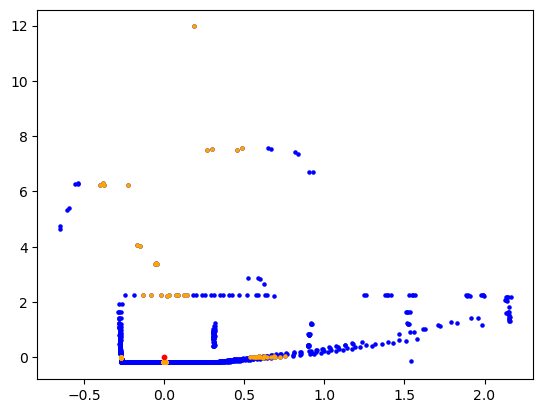

In [4]:
lowFilesNames = ['11', '12', '13', '14', '15', '16', '17', '18', '113', '114', '115', '116', '121', '122', '123', '124' ]
lowFilesCorrections = [-3, 3, 2.5, -9, 2, -7, -3, 0, 8, 6, 2, 9.5, -5, -6.5, 5, -1]

for i,name in enumerate(lowFilesNames):
    # define names of the file with the data and the new generated image
    filePath = f'../TestData/16-june/{name}.csv'
    imagePath = f'../TestData/16-june/visuals/low/wall/{name}.jpg'

    #locad file data
    lidarData = []
    with open(filePath, 'r') as file:
        csvReader = csv.reader(file)

        for row in csvReader:
            lidarData.append([float(row[0]),float(row[1])])
    lidarData = np.array(lidarData)
    
    #get cartesian coordinates
    x = lidarData[:,1]*np.cos((lidarData[:,0]+ lowFilesCorrections[i])*math.pi/180)/1000
    y = lidarData[:,1]*np.sin((lidarData[:,0]+ lowFilesCorrections[i])*math.pi/180)/1000

    #plot all points
    plt.clf()
    plt.scatter(x, y, s=5, color='blue')
    plt.scatter([0],[0], s=10, color='red')
    
    # plot wall points
    wallPoints = []
    for a in wallAngles:
        alphaRange = 4
        alpha1 = a + -alphaRange - lowFilesCorrections[i]
        alpha2 = a + alphaRange - lowFilesCorrections[i]
        wallPoints.append(lidarData[(lidarData[:, 0] >= alpha1) & (lidarData[:, 0] <= alpha2)])

    for wall in wallPoints:
        xWall = wall[:,1]*np.cos((wall[:,0]+ lowFilesCorrections[i])*math.pi/180)/1000
        yWall =  wall[:,1]*np.sin((wall[:,0]+ lowFilesCorrections[i])*math.pi/180)/1000
        plt.scatter(xWall, yWall, s=5, color='orange')
    
    plt.savefig(imagePath)
    

# June 17

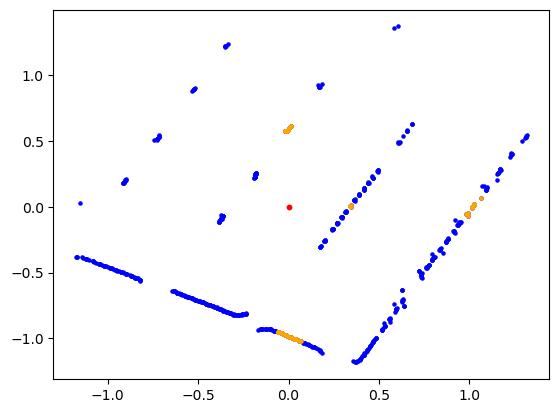

In [8]:
filesNames = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w']
wallAngles = [0,90,180,270]
maxDistance = 1.5*1000

for i,name in enumerate(filesNames):
    # define names of the file with the data and the new generated image
    filePath = f'../TestData/17-june/test2/raw/{name}.csv'
    imagePath = f'../TestData/17-june/test2/closeWall/{name}.jpg'

    #locad file data
    lidarData = []
    with open(filePath, 'r') as file:
        csvReader = csv.reader(file)

        for row in csvReader:
            if (float(row[1]) < maxDistance):
                lidarData.append([float(row[0]),float(row[1])])
    lidarData = np.array(lidarData)
    
    #get cartesian coordinates
    x = -lidarData[:,1]*np.cos(lidarData[:,0]*math.pi/180)/1000
    y = -lidarData[:,1]*np.sin(lidarData[:,0]*math.pi/180)/1000

    #plot all points
    plt.clf()
    plt.scatter(x, y, s=5, color='blue')
    plt.scatter([0],[0], s=10, color='red')
    
    # plot wall points
    wallPoints = []
    for a in wallAngles:
        alphaRange = 4
        alpha1 = a + -alphaRange
        alpha2 = a + alphaRange
        wallPoints.append(lidarData[(lidarData[:, 0] >= alpha1) & (lidarData[:, 0] <= alpha2)])

    for wall in wallPoints:
        xWall = -wall[:,1]*np.cos(wall[:,0]*math.pi/180)/1000
        yWall = -wall[:,1]*np.sin(wall[:,0]*math.pi/180)/1000
        plt.scatter(xWall, yWall, s=5, color='orange')
    
    plt.savefig(imagePath)
    